<a href="https://colab.research.google.com/github/RodriguesL1/DatathonFiap/blob/main/socioeconomico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [13]:
df=pd.read_excel('/content/PSE2020_domicílios.xlsx')

In [14]:
df.head()

,cod_domicilio,ano,total_moradores,entrevistador,nucleo_pm,cond_comicilio,conjugue_sexo_dif,conjugue_mesmo_sex,total_filhos,conjugue_domicilio,...,tipo_combutivel_cozinhar,tipo_moradia,qtd_moradoes_celular,telefone_fixo,geladeira,televisão,computador,internet,internet_celular,automovel
0,2020A1000,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,1,0,2,Com Cônjuge,...,Gás de botijão,Alugado,3,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim
1,2020A1001,2020,4,Jéssica,Centro,Pessoa responsável pelo domicílio,1,0,1,Com Cônjuge,...,Gás de botijão,Próprio de algum morador - já pago,4,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Não
2,2020A1002,2020,3,Jéssica,Centro,Pessoa responsável pelo domicílio,0,0,2,Sem Cônjuge,...,Gás de botijão,Próprio de algum morador - já pago,2,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Sim,Sim,Sim,Sim
3,2020B1016,2020,2,Adriana Jansen,Centro,Pessoa responsável pelo domicílio,0,0,1,Sem Cônjuge,...,Gás de botijão,Próprio de algum morador - ainda pagando,1,Não,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Não,Sim,Sim
4,2020B3000,2020,5,Adriana Jansen,Filipinho,Pessoa responsável pelo domicílio,1,0,3,Com Cônjuge,...,Gás de botijão,Próprio de algum morador - já pago,3,Sim,Sim,"Sim, somente de tela fina (LED, LCD ou plasma)",Não,Sim,Sim,Sim


In [15]:
df.columns

Index(['cod_domicilio', 'ano', 'total_moradores', 'entrevistador', 'nucleo_pm',
       'cond_comicilio', 'conjugue_sexo_dif', 'conjugue_mesmo_sex',
       'total_filhos', 'conjugue_domicilio', 'filhos_domicilio',
       'arranjo_familiar', 'genero', 'total_homem', 'total_mulher', 'idade',
       'cor', 'relacao_com_aluno', 'total_aluno_pm', 'total_bolsista',
       'total_bolsista_decisao', 'total_bolsista_joao_paulo',
       'total_bolsista_einstein', 'total_bolsista_fiap',
       'total_bolsista_unisa', 'total_bolsista_estacio',
       'total_bolsista_outros', 'total_inativos', 'total_pit',
       'total_populacao_ocupada', 'total_populacao_desoculpada',
       'total_trab_infantil', 'total_fft', 'total_forca_trab',
       'total_desempregados', 'total_trab_formal', 'total_trab_informal',
       'privacao_trab_formal', 'toal_reda_trab', 'total_ind_bpc_loas',
       'total_valor_bpc_loas', 'total_bolsa_familia',
       'total_valor_bolsa_familia', 'total_indi_outros_programas',
      

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_domicilio                 654 non-null    object 
 1   ano                           654 non-null    int64  
 2   total_moradores               654 non-null    int64  
 3   entrevistador                 654 non-null    object 
 4   nucleo_pm                     654 non-null    object 
 5   cond_comicilio                654 non-null    object 
 6   conjugue_sexo_dif             654 non-null    int64  
 7   conjugue_mesmo_sex            654 non-null    int64  
 8   total_filhos                  654 non-null    int64  
 9   conjugue_domicilio            654 non-null    object 
 10  filhos_domicilio              654 non-null    object 
 11  arranjo_familiar              654 non-null    object 
 12  genero                        654 non-null    object 
 13  total

In [25]:
polos_pm = df.nucleo_pm.unique()
polos_pm

array(['Centro', 'Filipinho', 'Granjinha', 'Cipó'], dtype=object)

In [27]:
polo_centro = df[df['nucleo_pm'] == polos_pm[0]]
polo_filipinho = df[df['nucleo_pm'] == polos_pm[1]]
polo_granjinha = df[df['nucleo_pm'] == polos_pm[2]]
polo_cipo = df[df['nucleo_pm'] == polos_pm[3]]

In [32]:
total_centro = polo_centro.nucleo_pm.count()
total_filipinho = polo_filipinho.nucleo_pm.count()
total_granjinha = polo_granjinha.nucleo_pm.count()
total_cipo = polo_cipo.nucleo_pm.count()

In [34]:
total_por_polo = [total_centro, total_filipinho, total_granjinha, total_cipo]

In [35]:
df_polos = pd.DataFrame({'polos':polos_pm, 'total_por_polo':total_por_polo})
df_polos

,polos,total_por_polo
0,Centro,288
1,Filipinho,180
2,Granjinha,67
3,Cipó,119


In [44]:
cores = [ '#FF5931', '#FBBA00' ,'#FFD401',  '#FF2E34','#FF8427','#257CBB', '#145089' ]

<ipython-input-45-38805f3bb5e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_polos,  x='polos', y='total_por_polo', palette=cores ,  width=0.50, hue=None)
<ipython-input-45-38805f3bb5e1>:1: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot(data=df_polos,  x='polos', y='total_por_polo', palette=cores ,  width=0.50, hue=None)


(0.0, 1000.0)

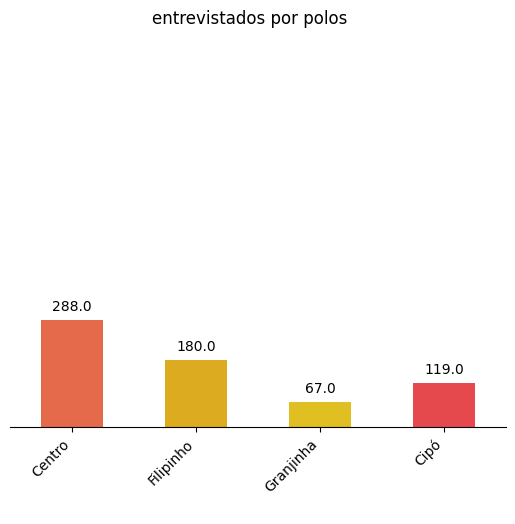

In [45]:
ax = sns.barplot(data=df_polos,  x='polos', y='total_por_polo', palette=cores ,  width=0.50, hue=None)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sns.despine(ax=ax, left=True, right=True, top=True, bottom=False)
ax.get_yaxis().set_visible(False)

plt.suptitle("entrevistados por polos", fontsize=12)
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.ylim(0,1000)